# Predicción de precios. Venta de departamentos.
## Buenos aires. 2020.

### Objetivos del proyecto:


*   Realizar un analisis exploratorio del dataset.
*   Realizar Feature Engineering; Identificar qué factores influyen en el target (precio).
*   Indagar en otros datasets y considerar sumarlos al modelo, aumentando así la eficacia.




# Importación del data set y primer vistazo.

In [1]:
#Importo los modulos necesarios.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [4]:
#Importo el data set.
data = pd.read_csv("C:/Users/migue/codigo/python/Buenos aires prices prediction/Datasets/departamentos-en-venta-2020.csv")
data.head()

Direccion  PropiedadS  Dolares    Pesos  DolaresM2  PesosM2  \
0  Pje Cnel J F Bogado 4561          17    54900  3513600       3229   206682   
1               BOGADO 4500          18    53000  3392000       2944   188444   
2       Pte H Yrigoyen 3381          25    45000  2880000       2500   160000   
3        PASAJE BOGADO 4500          18    41000  2624000       2278   145778   
4   Estado de Palestina 500          18    58900  3769600       3272   209422   

   Ambientes  Cotizacion Trimestre   Barrio  Comunas  
0          1          64   SEGUNDO  ALMAGRO        5  
1          1          64   SEGUNDO  ALMAGRO        5  
2          1          64   SEGUNDO  ALMAGRO        5  
3          1          64   SEGUNDO  ALMAGRO        5  
4          1          64   SEGUNDO  ALMAGRO        5

In [5]:
print("Columnas: ", data.shape[1], "\nFilas:", data.shape[0])

Columnas:  11 
Filas: 156258


El dataset contiene información sobre >150.000 departamentos en venta

In [6]:
print(data.isnull().sum())

Direccion      0
PropiedadS     0
Dolares        0
Pesos          0
DolaresM2      0
PesosM2        0
Ambientes      0
Cotizacion     0
Trimestre      0
Barrio        10
Comunas        0
dtype: int64


Considerando que hay sóll 10 entradas donde no hay un barrio registrado, voy a borrarlas del dataset siendo que no representa una cantidad considerable.

In [7]:
data.dropna(inplace=True)

Chequeo el tipo de los datos

In [8]:
data.dtypes

Direccion     object
PropiedadS     int64
Dolares        int64
Pesos          int64
DolaresM2      int64
PesosM2        int64
Ambientes      int64
Cotizacion     int64
Trimestre     object
Barrio        object
Comunas        int64
dtype: object

Todos los tipos están bien.
No estoy seguro que representa la columna "PropiedadS", y el dataset no ofrece infomación. Es un dato a averiguar en el siguiente análisis.

# Primer análisis.

In [31]:
data.describe(include="all")

Direccion  PropiedadS       Dolares            Pesos  DolaresM2  \
count     156248  156,248.00    156,248.00       156,248.00 156,248.00   
unique     43622         NaN           NaN              NaN        NaN   
top            0         NaN           NaN              NaN        NaN   
freq         337         NaN           NaN              NaN        NaN   
mean         NaN       74.18    213,955.51    14,385,628.41   2,913.18   
std          NaN       85.22    238,785.62    16,360,527.07   1,077.60   
min          NaN       11.00      7,200.00       439,200.00     147.00   
25%          NaN       41.00    107,000.00     7,089,000.00   2,250.00   
50%          NaN       58.00    150,000.00    10,077,500.00   2,757.00   
75%          NaN       85.00    235,000.00    15,936,000.00   3,375.00   
max          NaN   17,180.00 17,000,000.00 1,088,000,000.00  72,917.00   

            PesosM2  Ambientes  Cotizacion Trimestre   Barrio    Comunas  
count    156,248.00 156,248.00  156,248.00    156248   156248 156,248.00  
unique          NaN        NaN         NaN         4       52        NaN  
top             NaN        NaN         NaN   SEGUNDO  PALERMO        NaN  
freq            NaN        NaN         NaN    138259    21702        NaN  
mean     195,188.35       2.54       67.20       NaN      NaN       8.67  
std       72,605.50       1.11        3.56       NaN      NaN       4.85  
min        9,205.00      -7.00       61.00       NaN      NaN       1.00  
25%      150,641.75       2.00       64.00       NaN      NaN       4.00  
50%      184,550.00       2.00       67.00       NaN      NaN      10.00  
75%      225,456.25       3.00       70.00       NaN      NaN      13.00  
max    4,721,354.00       8.00       82.00       NaN      NaN      15.00

En la columna Ambientes no debería haber signos negativos, chequeo cuántos casos como esos hay en el dataframe.

In [9]:
data[data["Ambientes"] < 0]

Direccion  PropiedadS  Dolares    Pesos  DolaresM2  PesosM2  \
8254    GUEVARA 373          36    79000  5056000       2194   140444   
58399   GUEVARA 373          36    79000  5308800       2194   147467   
104486  GUEVARA 373          36    79000  5490500       2194   152514   

        Ambientes  Cotizacion Trimestre     Barrio  Comunas  
8254           -7          64   SEGUNDO  CHACARITA       15  
58399          -7          67   SEGUNDO  CHACARITA       15  
104486         -7          70   SEGUNDO  CHACARITA       15

In [10]:
index = data[data["Ambientes"] < 0].index
data.drop(index, inplace=True)
data[data["Ambientes"] < 0]

Empty DataFrame
Columns: [Direccion, PropiedadS, Dolares, Pesos, DolaresM2, PesosM2, Ambientes, Cotizacion, Trimestre, Barrio, Comunas]
Index: []

In [11]:
data.describe(include="all")

Direccion  PropiedadS       Dolares            Pesos  DolaresM2  \
count     156245  156,245.00    156,245.00       156,245.00 156,245.00   
unique     43621         NaN           NaN              NaN        NaN   
top            0         NaN           NaN              NaN        NaN   
freq         337         NaN           NaN              NaN        NaN   
mean         NaN       74.18    213,958.10    14,385,803.15   2,913.20   
std          NaN       85.22    238,787.18    16,360,635.52   1,077.61   
min          NaN       11.00      7,200.00       439,200.00     147.00   
25%          NaN       41.00    107,000.00     7,089,000.00   2,250.00   
50%          NaN       58.00    150,000.00    10,077,500.00   2,757.00   
75%          NaN       85.00    235,000.00    15,936,000.00   3,375.00   
max          NaN   17,180.00 17,000,000.00 1,088,000,000.00  72,917.00   

            PesosM2  Ambientes  Cotizacion Trimestre   Barrio    Comunas  
count    156,245.00 156,245.00  156,245.00    156245   156245 156,245.00  
unique          NaN        NaN         NaN         4       52        NaN  
top             NaN        NaN         NaN   SEGUNDO  PALERMO        NaN  
freq            NaN        NaN         NaN    138256    21702        NaN  
mean     195,189.28       2.54       67.20       NaN      NaN       8.67  
std       72,605.88       1.11        3.56       NaN      NaN       4.85  
min        9,205.00       0.00       61.00       NaN      NaN       1.00  
25%      150,644.00       2.00       64.00       NaN      NaN       4.00  
50%      184,553.00       2.00       67.00       NaN      NaN      10.00  
75%      225,457.00       3.00       70.00       NaN      NaN      13.00  
max    4,721,354.00       8.00       82.00       NaN      NaN      15.00

También me genera inquietud una propiedad con 0 ambientes, por lo que chequeo qué casos son.

In [12]:
data[data["Ambientes"] == 0].count()

Direccion     25
PropiedadS    25
Dolares       25
Pesos         25
DolaresM2     25
PesosM2       25
Ambientes     25
Cotizacion    25
Trimestre     25
Barrio        25
Comunas       25
dtype: int64

Teniendo en cuenta que sé de antemano que la cantidad  de ambientes es un factor decisivo a la hora de tasar una propiedad, voy a borrar aquellas entradas cuyo valor sea 0.

In [13]:
index = data[data["Ambientes"] == 0].index
data.drop(index,inplace=True)
data[data["Ambientes"] == 0].count()

Direccion     0
PropiedadS    0
Dolares       0
Pesos         0
DolaresM2     0
PesosM2       0
Ambientes     0
Cotizacion    0
Trimestre     0
Barrio        0
Comunas       0
dtype: int64

In [14]:
data.describe(include="all")

Direccion  PropiedadS       Dolares            Pesos  DolaresM2  \
count     156220  156,220.00    156,220.00       156,220.00 156,220.00   
unique     43612         NaN           NaN              NaN        NaN   
top            0         NaN           NaN              NaN        NaN   
freq         337         NaN           NaN              NaN        NaN   
mean         NaN       74.19    213,969.33    14,386,585.99   2,913.20   
std          NaN       85.22    238,800.87    16,361,591.68   1,077.63   
min          NaN       11.00      7,200.00       439,200.00     147.00   
25%          NaN       41.00    107,000.00     7,089,000.00   2,250.00   
50%          NaN       58.00    150,000.00    10,077,500.00   2,757.00   
75%          NaN       85.00    235,000.00    15,936,000.00   3,375.00   
max          NaN   17,180.00 17,000,000.00 1,088,000,000.00  72,917.00   

            PesosM2  Ambientes  Cotizacion Trimestre   Barrio    Comunas  
count    156,220.00 156,220.00  156,220.00    156220   156220 156,220.00  
unique          NaN        NaN         NaN         4       52        NaN  
top             NaN        NaN         NaN   SEGUNDO  PALERMO        NaN  
freq            NaN        NaN         NaN    138255    21699        NaN  
mean     195,189.66       2.54       67.20       NaN      NaN       8.67  
std       72,607.48       1.11        3.56       NaN      NaN       4.85  
min        9,205.00       1.00       61.00       NaN      NaN       1.00  
25%      150,644.75       2.00       64.00       NaN      NaN       4.00  
50%      184,555.50       2.00       67.00       NaN      NaN      10.00  
75%      225,455.25       3.00       70.00       NaN      NaN      13.00  
max    4,721,354.00       8.00       82.00       NaN      NaN      15.00

Veo que hay mucha diferencia entre el 25% de departamentos más caros, asi que voy a utilizar sólo los departamentos cuyo valor en dolares es menor a 300.000, esperando así ganar mayor eficacia en el modelo, en el caso de uso más normal.

In [15]:
df = data[data["Dolares"] < 300000]
df.shape

(132125, 11)

# Análisis con gráficos
Análisis exploratorio del dataset utilizando gráficos.

## Ambientes

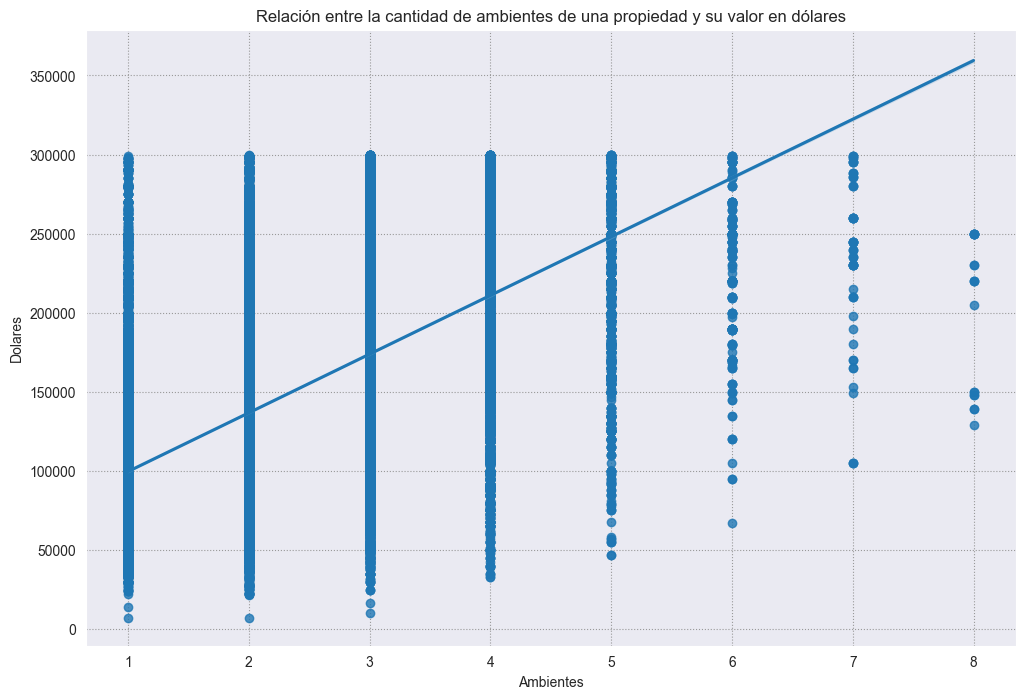

In [39]:
plt.figure(figsize=(12,8))
sns.regplot(x="Ambientes",y="Dolares",data=df)
plt.title("Relación entre la cantidad de ambientes de una propiedad y su valor en dólares")
plt.show()


Vemos que hay claramente una relación lineal positiva entre la cantidad de ambientes de un departamento y su precio en dolares. Analizo como es la distribución de las propiedades según sus ambientes.

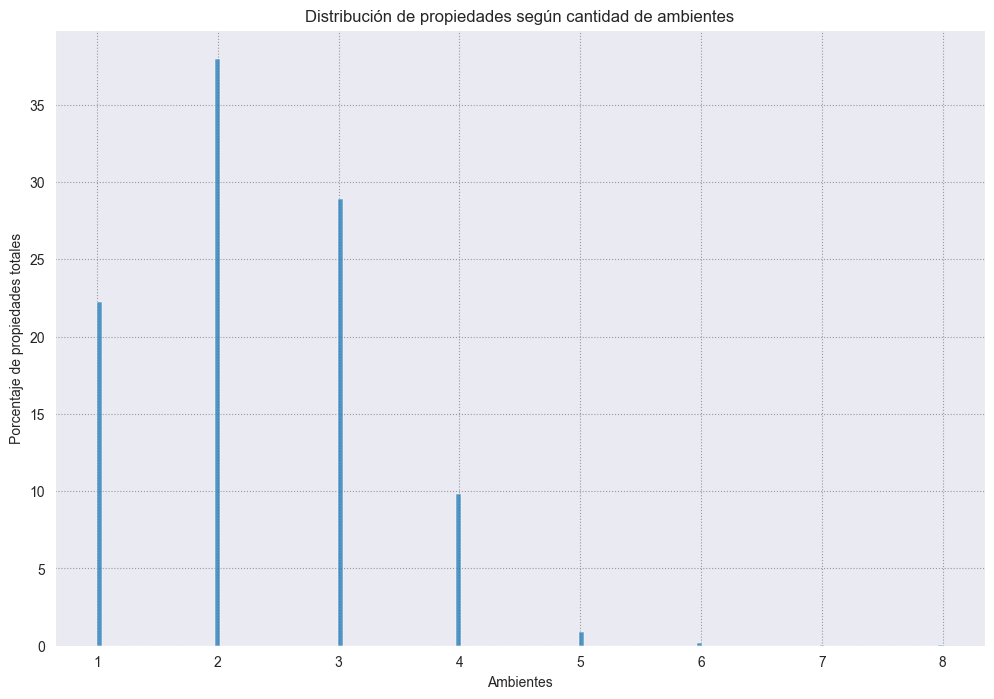

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(x="Ambientes",data=df,stat="percent")
plt.title("Distribución de propiedades según cantidad de ambientes")
plt.ylabel("Porcentaje de propiedades totales")
plt.show()

## Barrio

In [16]:
barrios_media=df.groupby(['Barrio'])['Dolares'].mean().sort_values(ascending=True)

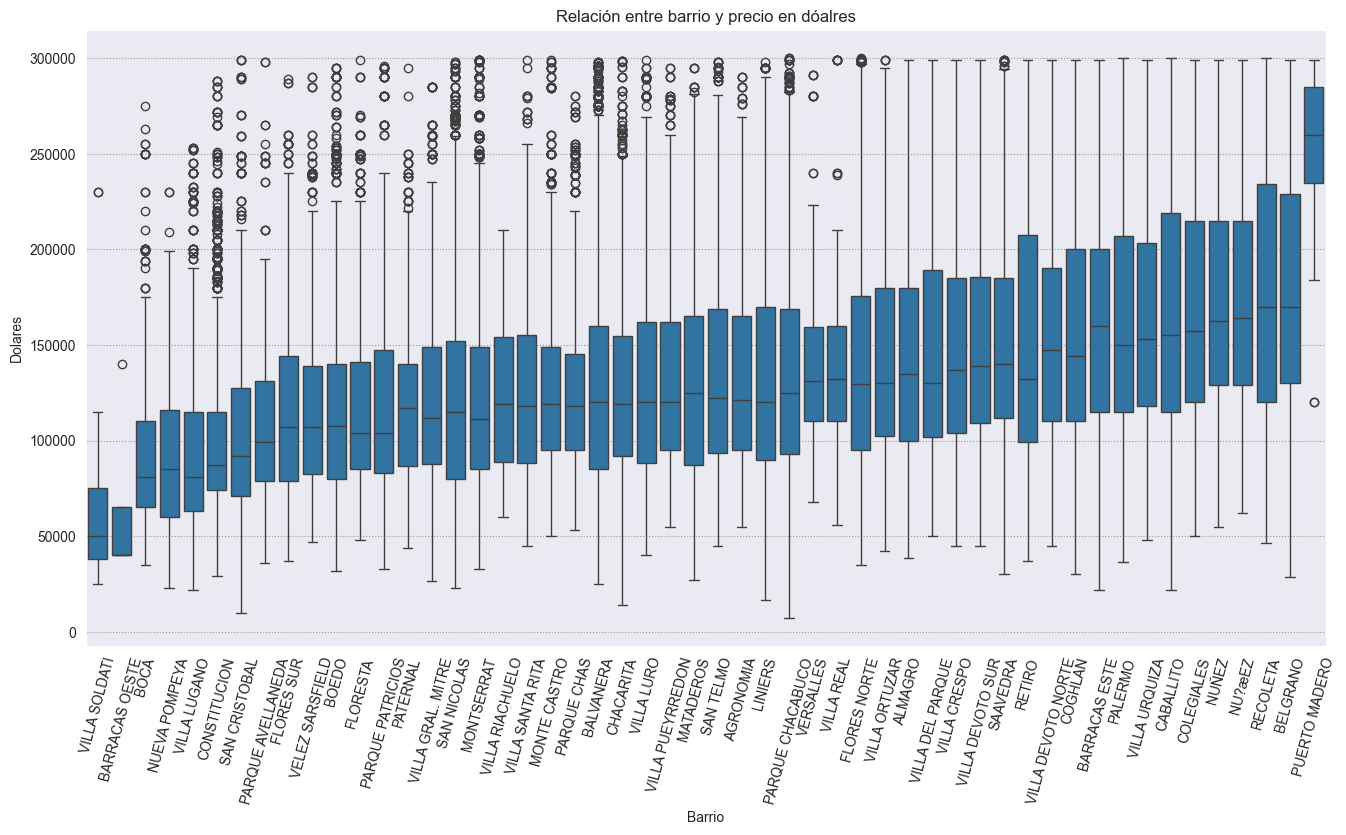

In [42]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Barrio",y="Dolares",data=df,order=barrios_media.index)
plt.xticks(rotation=75)
plt.title("Relación entre barrio y precio en dóalres")
plt.show()

Tambien vemos que hay una relación muy ferte en entre el barrio de la propiedad y su valor en dólares.

In [43]:
barrios_count=df.groupby(['Barrio'])['Dolares'].count().sort_values(ascending=True)


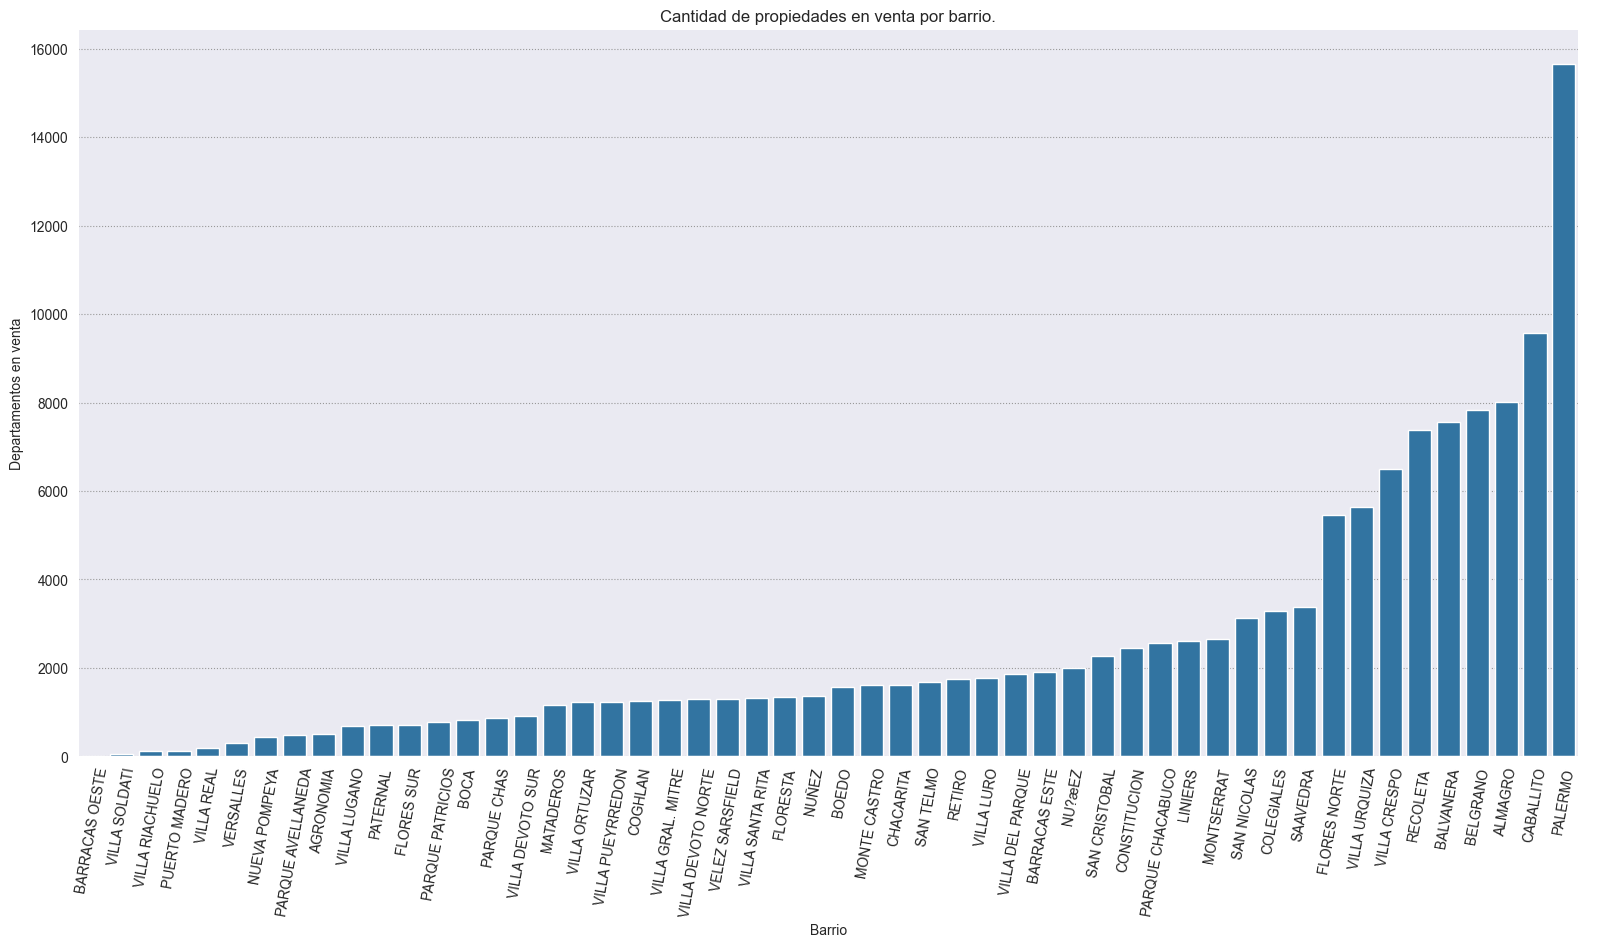

In [44]:
sns.catplot(x="Barrio",kind="count",data=df,order=barrios_count.index, height=8, aspect=2)
plt.xticks(rotation=80)
plt.title("Cantidad de propiedades en venta por barrio.")
plt.ylabel("Departamentos en venta")
plt.show()

# Metros cuadrados

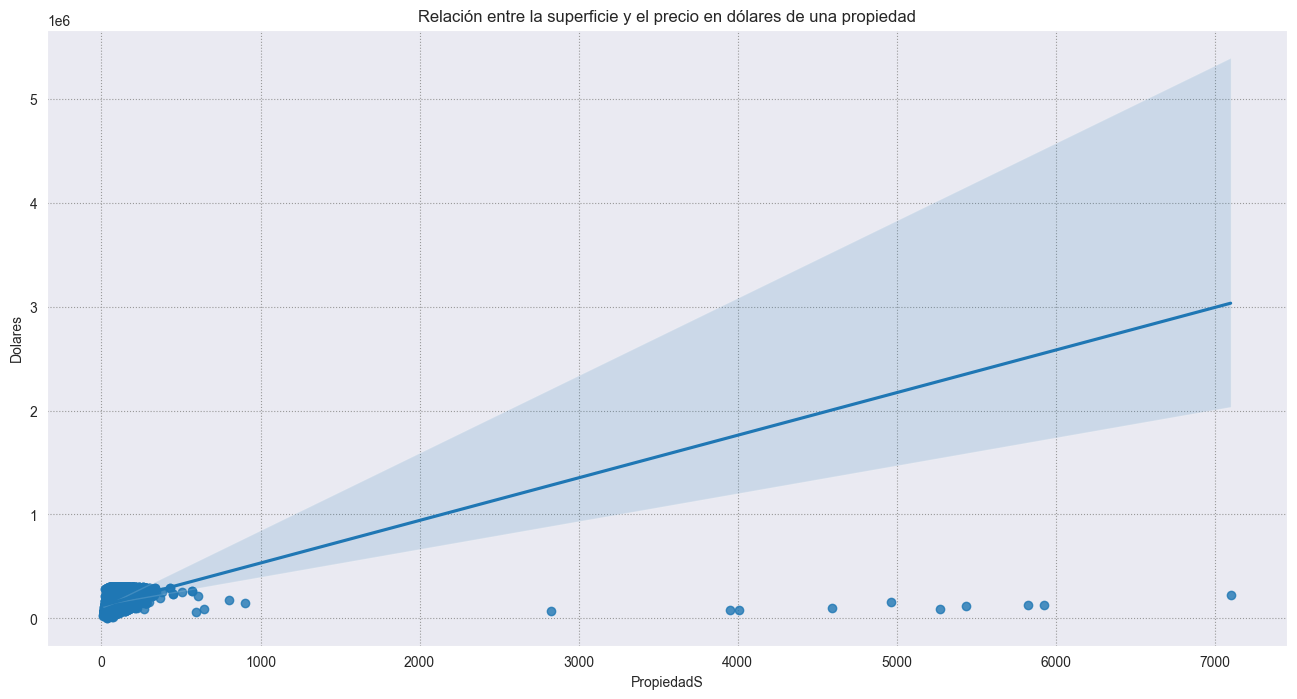

In [45]:
plt.figure(figsize=(16,8))
sns.regplot(x="PropiedadS",y="Dolares",data=df)
plt.title("Relación entre la superficie y el precio en dólares de una propiedad")
plt.show()

Veo que hay muy pocos departamentos que tengan mas de 1000 metros cuadrados, voy a analizar si vale la pena sacarlos del dataset.

In [17]:
df[df["PropiedadS"]>1000].count()

Direccion     10
PropiedadS    10
Dolares       10
Pesos         10
DolaresM2     10
PesosM2       10
Ambientes     10
Cotizacion    10
Trimestre     10
Barrio        10
Comunas       10
dtype: int64

Efectivamente, tan solo 10 propiedades tienen mas de 1000 metros cuadrados, por lo que voy a descartarlas para evitar el ruido en el posterior modelado.


In [18]:
index_m2 = df[df["PropiedadS"]>1000].index
df.drop(index_m2, inplace=True)

C:\Users\migue\AppData\Local\Temp\ipykernel_9568\3356572005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index_m2, inplace=True)


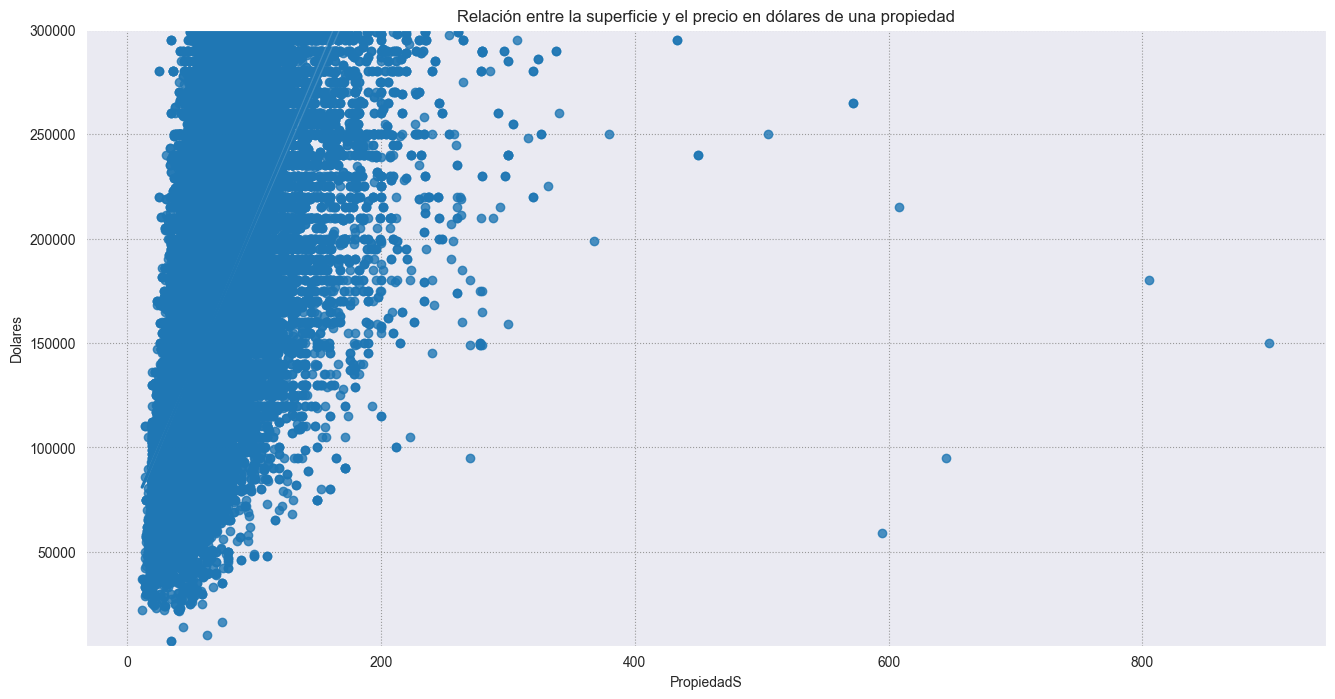

In [48]:
plt.figure(figsize=(16,8))
sns.regplot(x="PropiedadS",y="Dolares",data=df)
plt.title("Relación entre la superficie y el precio en dólares de una propiedad")
plt.ylim(5000,300000)
plt.show()

Voy a seguir eliminado aquellas propiedades que posean mas de 400m2, siendo estas muy pocas para el dataset que poseo.

In [19]:
index_400_m2 = df[df["PropiedadS"]>400].index
df.drop(index_400_m2,inplace=True)

C:\Users\migue\AppData\Local\Temp\ipykernel_9568\2316139739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index_400_m2,inplace=True)


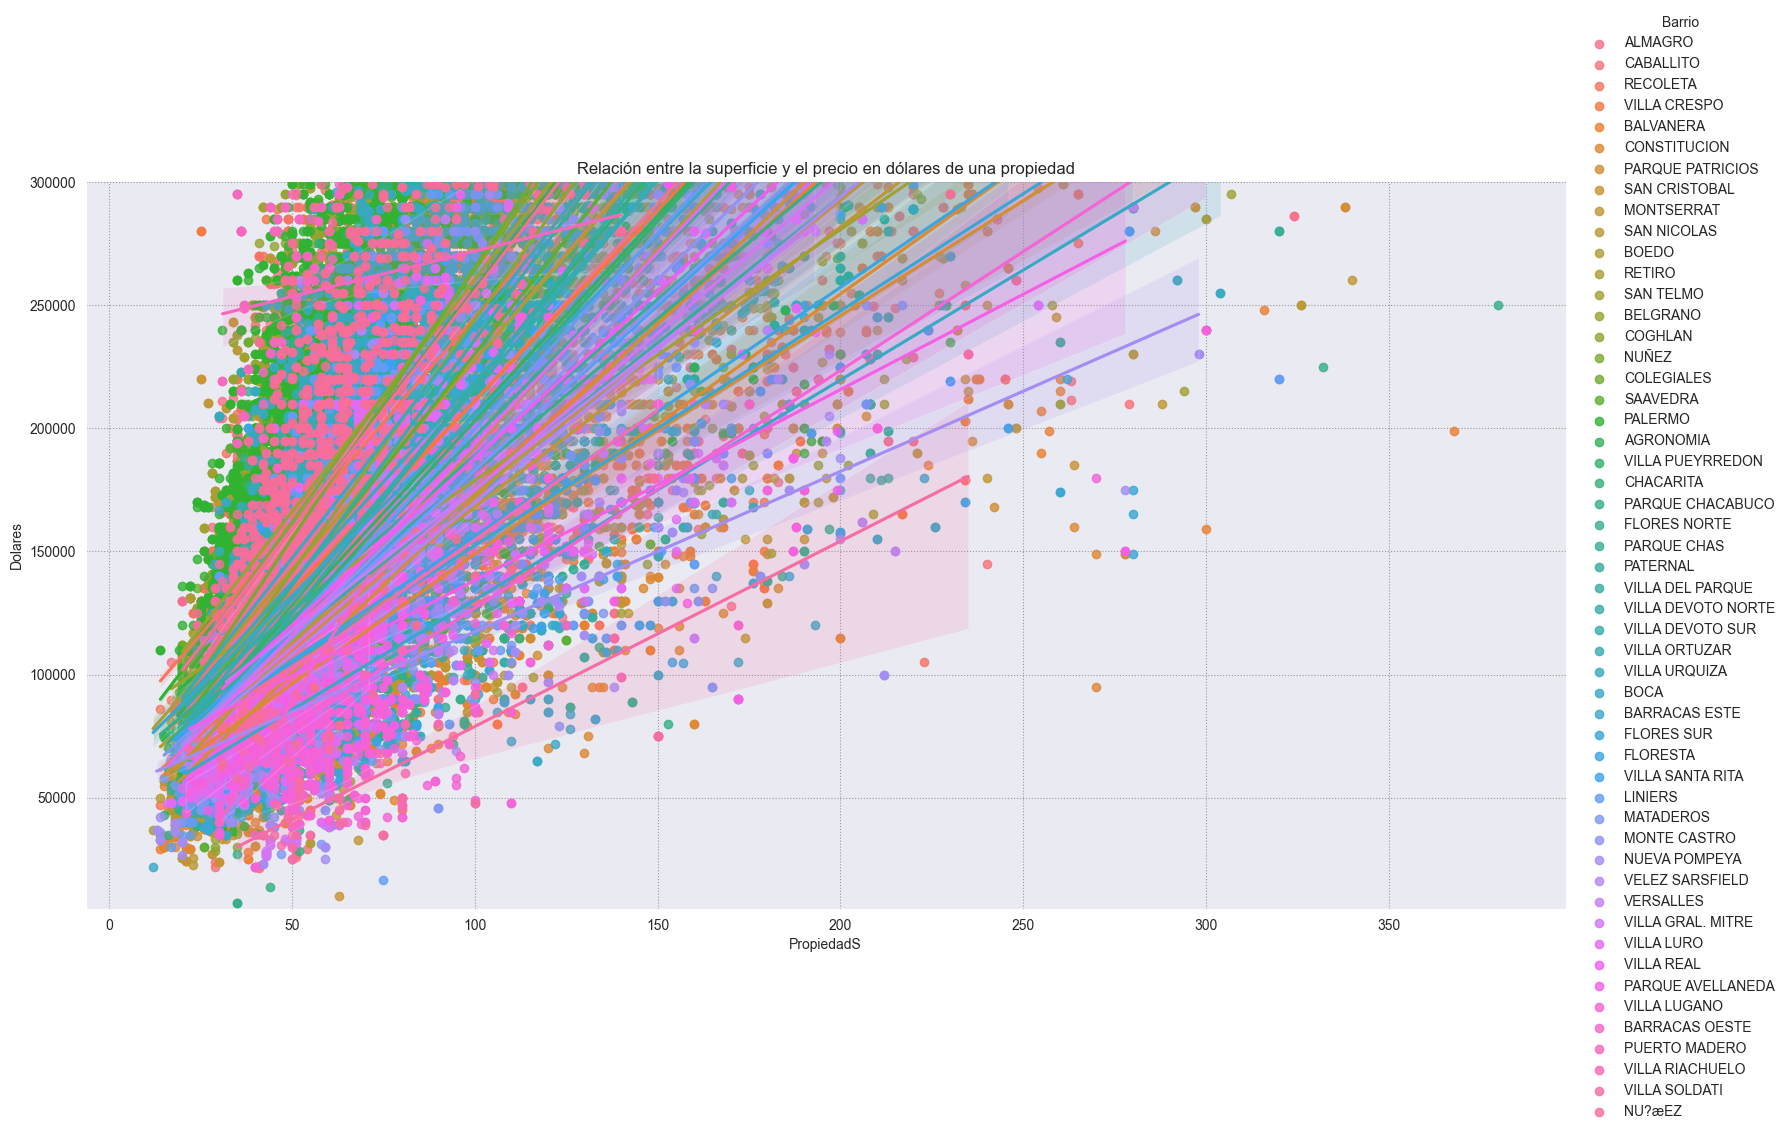

In [50]:
sns.lmplot(x="PropiedadS",y="Dolares",data=df,hue="Barrio", height=8, aspect=2)
plt.title("Relación entre la superficie y el precio en dólares de una propiedad")
plt.ylim(5000,300000)
plt.show()

El anterior gráfico no es un buen gráfico; es difícil de entender y claramente sería buena idea incluirlo en un reporte final, pero es útil para este momento. Ese gráfico demuestra la la relación entre la superficie y el precio en dólares de un departamento, pero lo calcula según  el barrio. De esa manera se puede ver que la relación lineal es fuerte, pero en un gráfico donde no se considere el barrio, esta no queda tan clara.
Además, deja expuesto que la relación no es la misma en todos los barrios, lo cual tiene sentido partiendo de la base que los metros cuadrados por barrio tienen distino valor.

Ésta sería una versión levemente más potable del anterior gráfico, donde se ve cada una de las relaciones lineanes que existirían entre las variables:

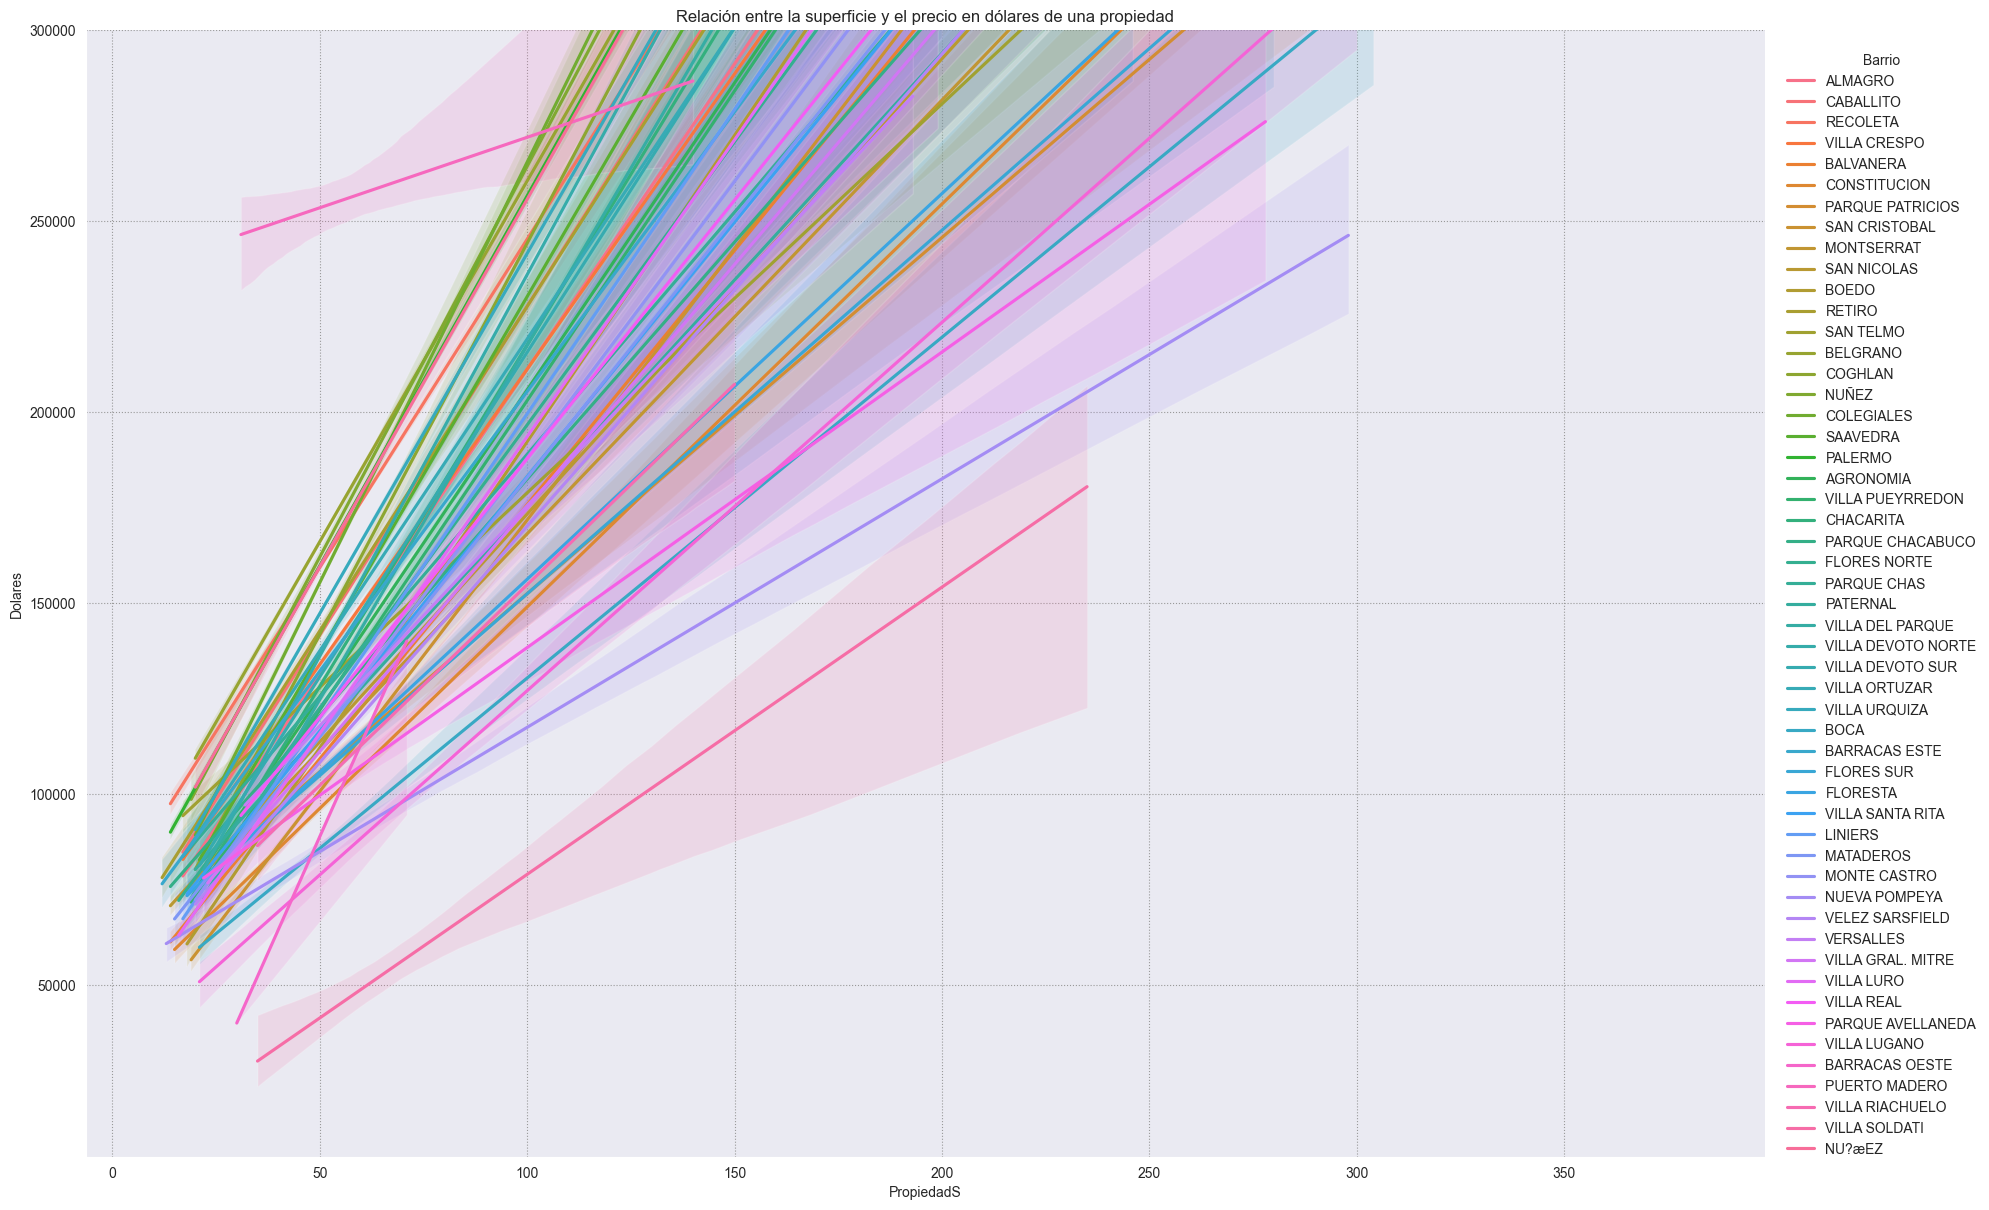

In [51]:
sns.lmplot(x="PropiedadS",y="Dolares",data=df,hue="Barrio", height=12, aspect=1.5, scatter=False)
plt.title("Relación entre la superficie y el precio en dólares de una propiedad")
plt.ylim(5000,300000)
plt.show()

Volviendo a analizar los gráficos, creo que sigue habiendo bastantes outliers según la superficie de la propiedad.

In [20]:
print("Propiedades con menos de 250 m2",df[df["PropiedadS"] < 250].count()[0],"\nPropiedades con más de 250m2",df[df["PropiedadS"] >= 250].count()[0])

Propiedades con menos de 250 m2 132017 
Propiedades con más de 250m2 86


C:\Users\migue\AppData\Local\Temp\ipykernel_9568\2811440521.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Propiedades con menos de 250 m2",df[df["PropiedadS"] < 250].count()[0],"\nPropiedades con más de 250m2",df[df["PropiedadS"] >= 250].count()[0])
C:\Users\migue\AppData\Local\Temp\ipykernel_9568\2811440521.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Propiedades con menos de 250 m2",df[df["PropiedadS"] < 250].count()[0],"\nPropiedades con más de 250m2",df[df["PropiedadS"] >= 250].count()[0])


In [21]:
index_m2_250 = df[df["PropiedadS"] > 250].index
df.drop(index_m2_250,inplace=True)

C:\Users\migue\AppData\Local\Temp\ipykernel_9568\1540030017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index_m2_250,inplace=True)


Vuelvo a generar los gráficos.

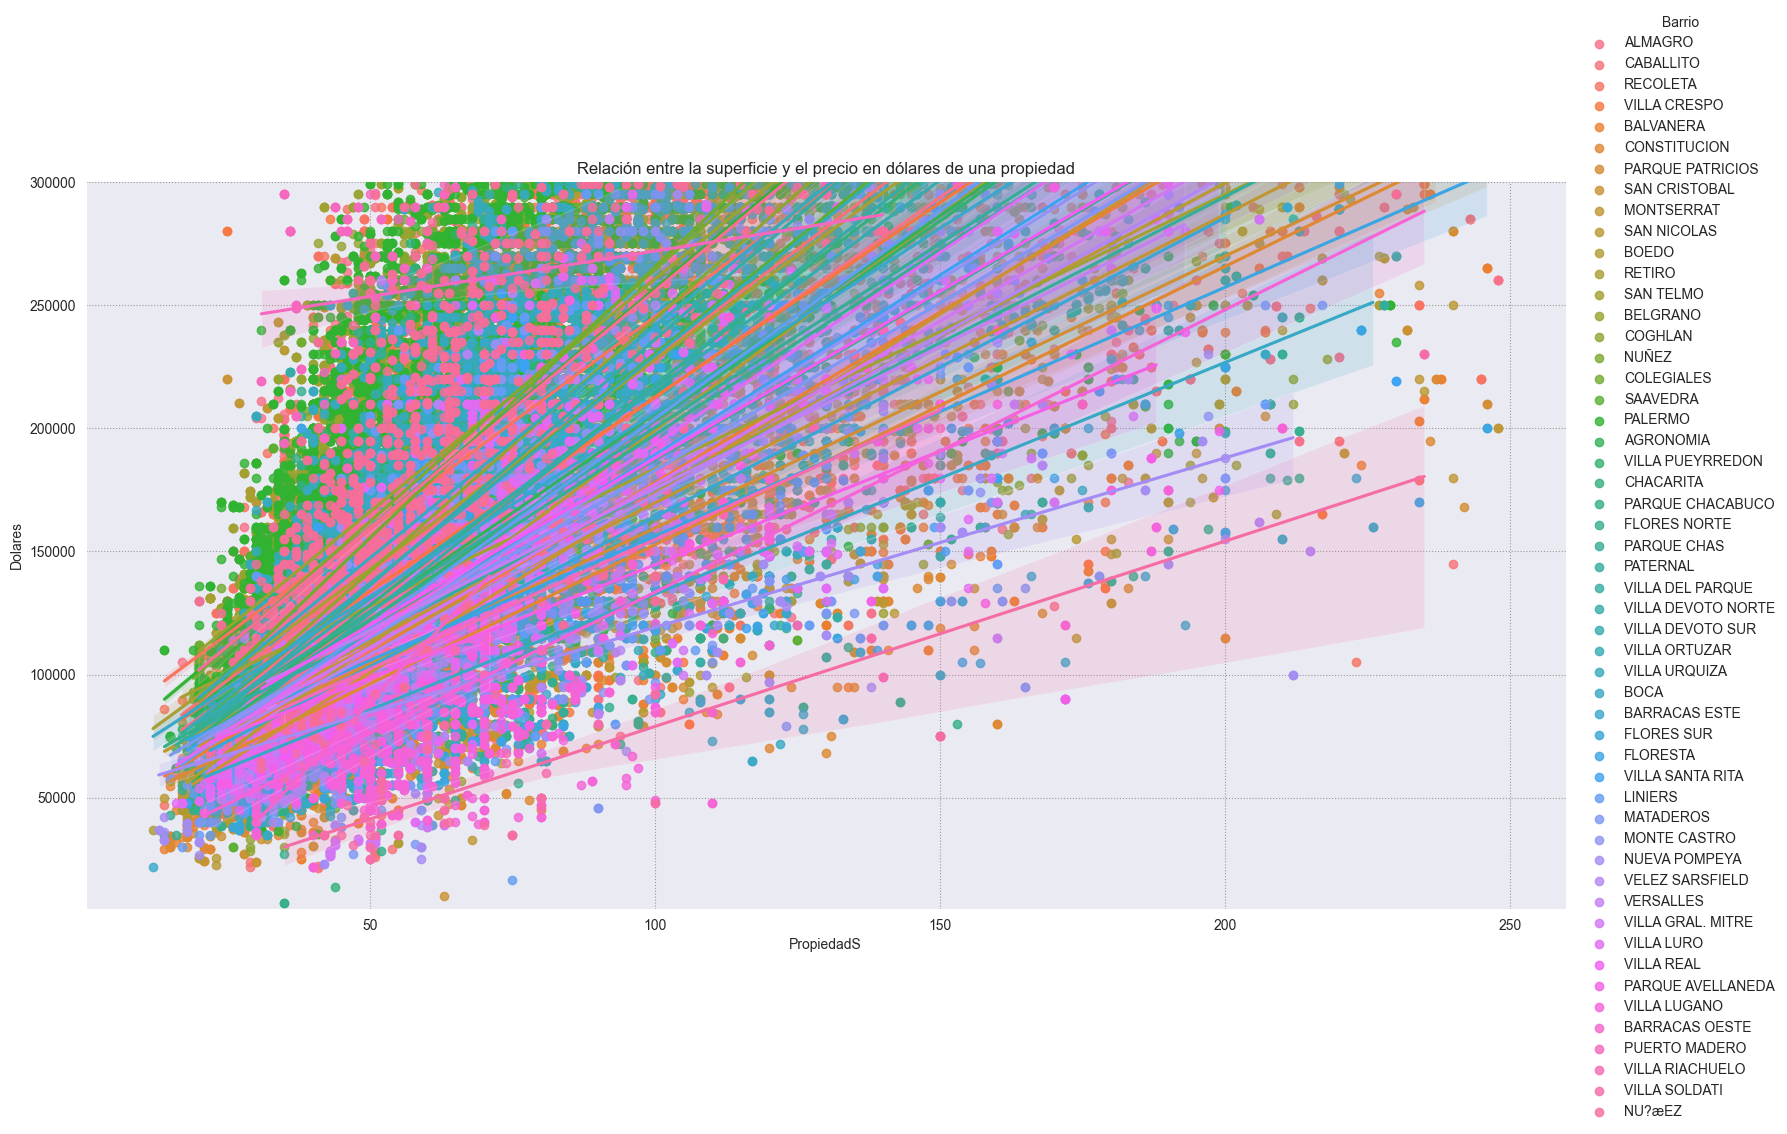

In [54]:
sns.lmplot(x="PropiedadS",y="Dolares",data=df,hue="Barrio", height=8, aspect=2)
plt.title("Relación entre la superficie y el precio en dólares de una propiedad")
plt.ylim(5000,300000)
plt.show()

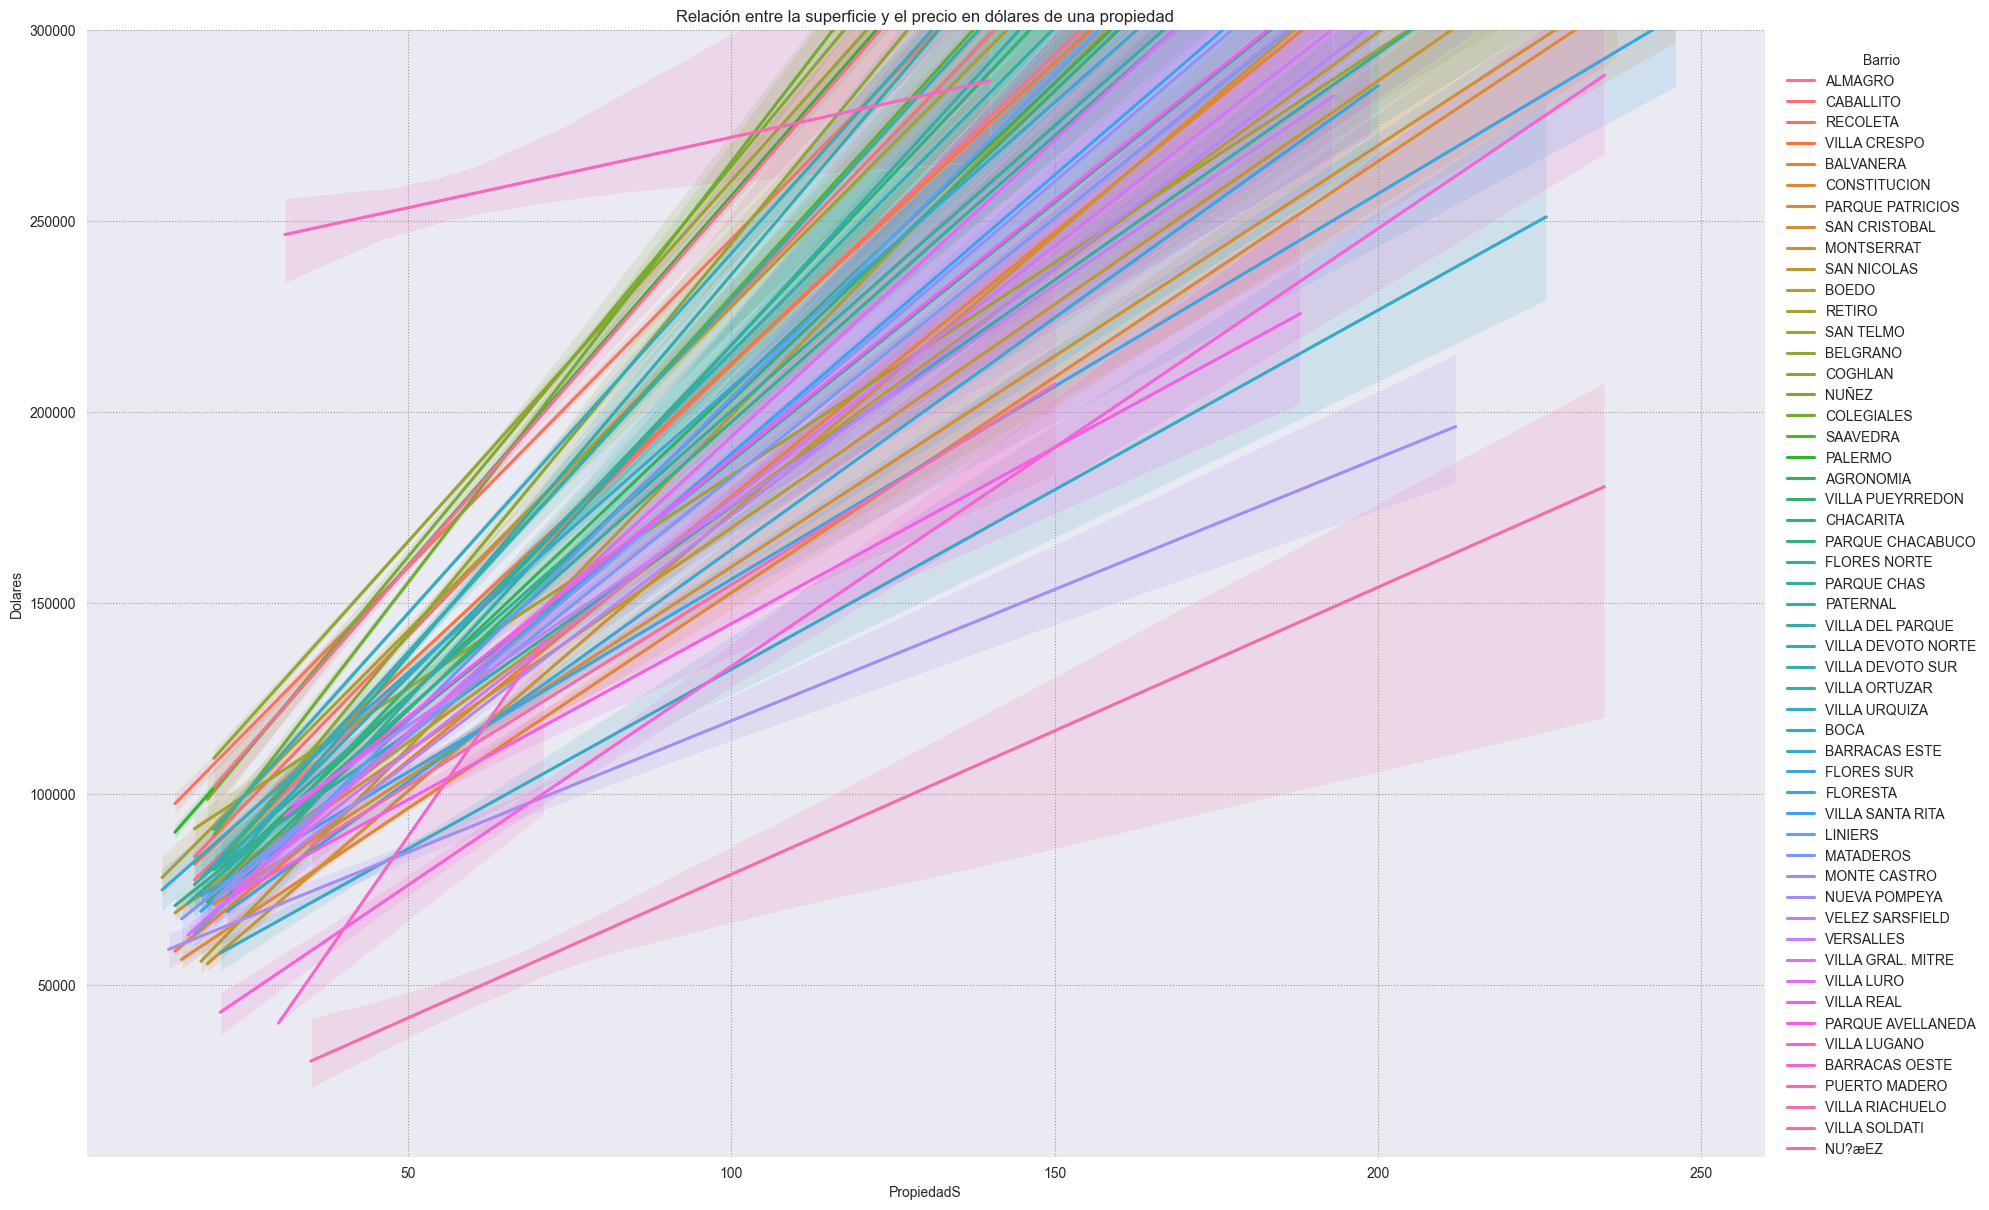

In [22]:
sns.lmplot(x="PropiedadS",y="Dolares",data=df,hue="Barrio", height=12, aspect=1.5, scatter=False)
plt.title("Relación entre la superficie y el precio en dólares de una propiedad")
plt.ylim(5000,300000)
plt.show()

**Conclusión preliminar.**

Existe una clara y fuerte relación entre la superficie y los metros cuadrados de una propiedad, pero ésta es distinta depende el barrio en el que la misma se encuentre. Por eso, no puedo descartar ninguno de los tres atributos a la hora de crear el modelo predictivo
Así como está guardo el dataframe para el modelado.

In [23]:
df.to_csv("Dataframe.csv",index=False)